#Introduccion al TP general


En este TP vamos a analizar la base de datos de Partos y cesáreas (2018-2022) por año, región sanitaria, establecimiento, municipio y dependencia.
-Ministerio de Salud de la Provincia de Buenos Aires.

Primero importamos los paquetes

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Carga de datos:

In [134]:
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [136]:
# Cargar los datos
df = pd.read_csv("/content/drive/MyDrive/MD-G/datosTPGeneral.csv")

In [139]:
df

,anio,region_sanitaria,municipio_id,municipio_nombre,establecimiento_id,establecimiento_nombre,establecimiento_dependencia,practica_nombre,cantidad
0,2018,X,6784,Suipacha,78400106,Asociacion Hogar de Ancianos de Suipacha,Municipal,Cesarea,1
1,2018,X,6784,Suipacha,78400106,Asociacion Hogar de Ancianos de Suipacha,Municipal,Forceps,1
2,2018,X,6784,Suipacha,78400106,Asociacion Hogar de Ancianos de Suipacha,Municipal,Otros,0
3,2018,X,6784,Suipacha,78400106,Asociacion Hogar de Ancianos de Suipacha,Municipal,Parto normal,1
4,2018,X,6707,Saladillo,70700151,C.A.P.S. 31 de Julio,Municipal,Cesarea,0
...,...,...,...,...,...,...,...,...,...
21807,2022,XII,6427,La Matanza,42702379,UPA 18,Provincial,Forceps,0
21808,2022,XII,6427,La Matanza,42702418,Hospital SAMIC Dr. Rene Favaloro,Provincial,Parto Normal,28
21809,2022,XII,6427,La Matanza,42702418,Hospital SAMIC Dr. Rene Favaloro,Provincial,Cesarea,26
21810,2022,XII,6427,La Matanza,42702418,Hospital SAMIC Dr. Rene Favaloro,Provincial,Otros,0


In [140]:
# Información general del dataset
print("\nInformación del dataset:")
print(df.info())


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21812 entries, 0 to 21811
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   anio                         21812 non-null  int64 
 1   region_sanitaria             21812 non-null  object
 2   municipio_id                 21812 non-null  int64 
 3   municipio_nombre             21812 non-null  object
 4   establecimiento_id           21812 non-null  int64 
 5   establecimiento_nombre       21812 non-null  object
 6   establecimiento_dependencia  21812 non-null  object
 7   practica_nombre              21812 non-null  object
 8   cantidad                     21812 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.5+ MB
None


In [141]:
# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df.describe())


Estadísticas descriptivas:
               anio  municipio_id  establecimiento_id      cantidad
count  21812.000000  21812.000000        2.181200e+04  21812.000000
mean    2019.981478   6470.209609        4.702143e+07     25.331606
std        1.415615    236.716935        2.367168e+07    154.276417
min     2018.000000   6007.000000        7.000140e+05      0.000000
25%     2019.000000   6301.000000        3.010001e+07      0.000000
50%     2020.000000   6448.000000        4.480006e+07      0.000000
75%     2021.000000   6638.000000        6.380101e+07      0.000000
max     2022.000000   6882.000000        8.820088e+07   4052.000000


Limpieza de datos

In [142]:
# Verificar valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
anio                           0
region_sanitaria               0
municipio_id                   0
municipio_nombre               0
establecimiento_id             0
establecimiento_nombre         0
establecimiento_dependencia    0
practica_nombre                0
cantidad                       0
dtype: int64


In [143]:
# Verificar valores únicos en columnas categóricas
print("\nValores únicos en columnas categóricas:")
print("Regiones sanitarias:", df['region_sanitaria'].unique())
print("Prácticas:", df['practica_nombre'].unique())
print("Dependencias:", df['establecimiento_dependencia'].unique())


Valores únicos en columnas categóricas:
Regiones sanitarias: ['X' 'V' 'VII' 'I' 'VIII' 'IV' 'III' 'IX' 'XII' 'VI' 'II' 'XI']
Prácticas: ['Cesarea' 'Forceps' 'Otros' 'Parto normal' 'Parto Normal']
Dependencias: ['Municipal' 'Nacional' 'Provincial']


In [144]:
#Filtrar solo establecimientos con al menos un parto registrado
df = df[df['cantidad'] > 0]

# Análisis de partos por tipo
partos_por_tipo = df.groupby('practica_nombre')['cantidad'].sum().reset_index()
print("\nTotal de partos por tipo:")
print(partos_por_tipo)

# Análisis por año
partos_por_anio = df.groupby('anio')['cantidad'].sum().reset_index()
print("\nTotal de partos por año:")
print(partos_por_anio)

# Análisis por región sanitaria
partos_por_region = df.groupby('region_sanitaria')['cantidad'].sum().reset_index().sort_values('cantidad', ascending=False)
print("\nTotal de partos por región sanitaria:")
print(partos_por_region)


Total de partos por tipo:
  practica_nombre  cantidad
0         Cesarea    228466
1         Forceps       534
2           Otros      2771
3    Parto Normal     51139
4    Parto normal    269623

Total de partos por año:
   anio  cantidad
0  2018    130906
1  2019    115510
2  2020    108424
3  2021    101068
4  2022     96625

Total de partos por región sanitaria:
   region_sanitaria  cantidad
6                VI    120440
5                 V    115770
7               VII     91269
10               XI     53225
11              XII     47208
8              VIII     38804
3                IV     23439
0                 I     20310
9                 X     12159
4                IX     11442
1                II     10681
2               III      7786


#Gràficos

<ipython-input-157-58f48692ecb0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='practica_nombre', y='cantidad', data=partos_por_tipo, palette='viridis')


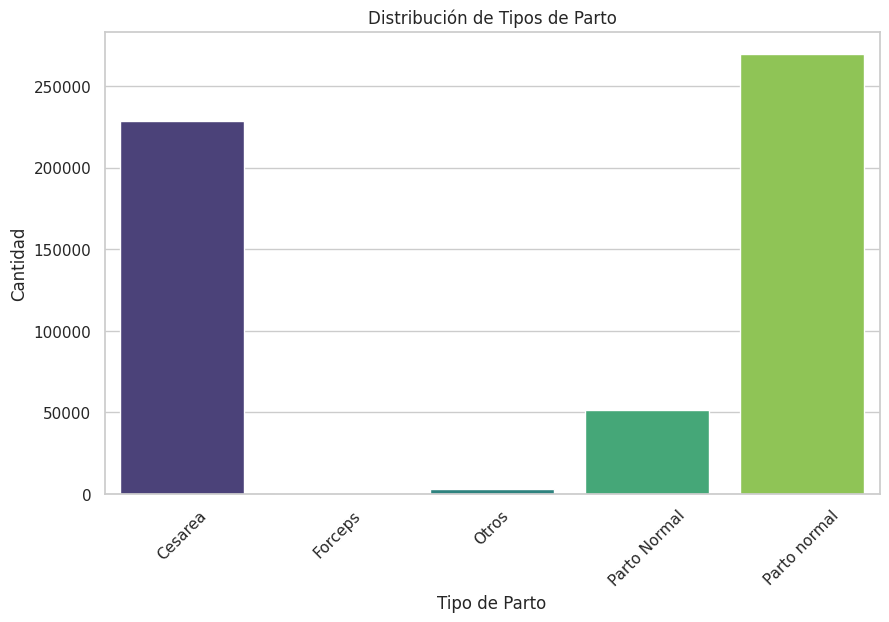

In [157]:
# Gráfico 1: Distribución de tipos de parto
plt.figure(figsize=(10, 6))
sns.barplot(x='practica_nombre', y='cantidad', data=partos_por_tipo, palette='viridis')
plt.savefig('/content/drive/MyDrive/MD-G/nombre_del_grafico.png')
plt.title('Distribución de Tipos de Parto')
plt.xlabel('Tipo de Parto')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()


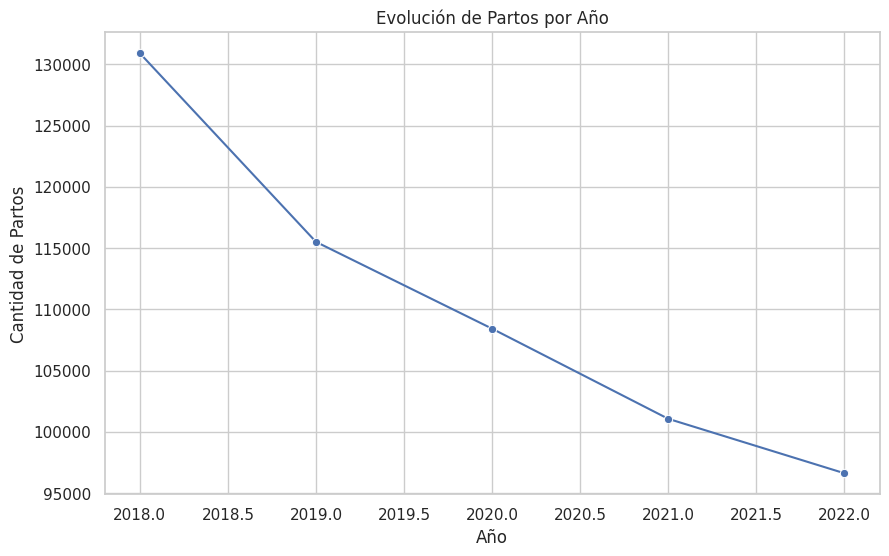

In [156]:
# Gráfico 2: Evolución de partos por año
plt.figure(figsize=(10, 6))
sns.lineplot(x='anio', y='cantidad', data=partos_por_anio, marker='o')
plt.savefig('/content/drive/MyDrive/MD-G/nombre_del_grafico.png')
plt.title('Evolución de Partos por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Partos')
plt.grid(True)
plt.show()

<ipython-input-152-c96b9e0b846f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region_sanitaria', y='cantidad', data=partos_por_region, palette='rocket')


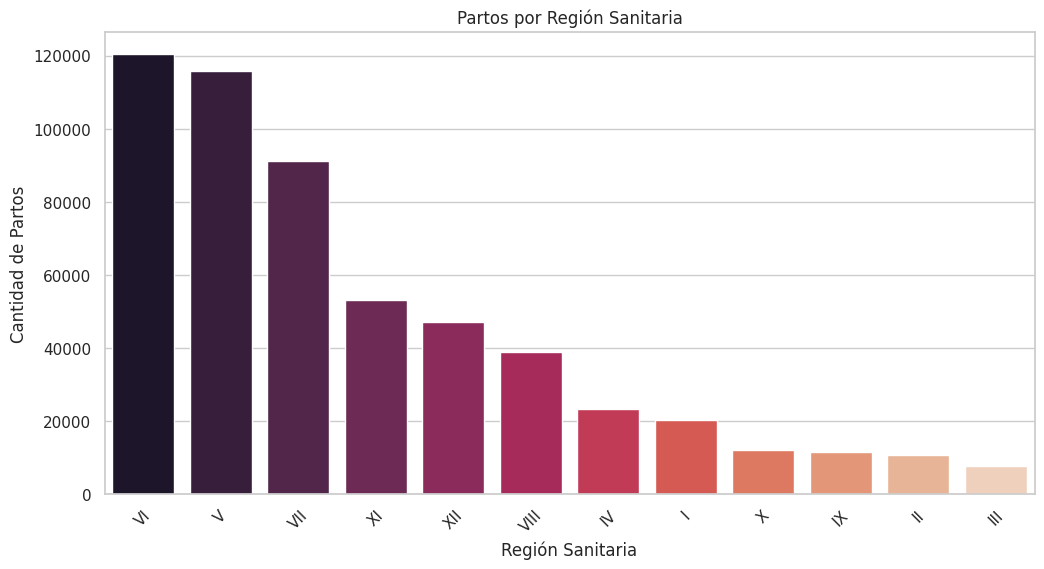

In [152]:
# Gráfico 3: Partos por región sanitaria
plt.figure(figsize=(12, 6))
sns.barplot(x='region_sanitaria', y='cantidad', data=partos_por_region, palette='rocket')
plt.savefig('/content/drive/MyDrive/MD-G/nombre_del_grafico.png')
plt.title('Partos por Región Sanitaria')
plt.xlabel('Región Sanitaria')
plt.ylabel('Cantidad de Partos')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x600 with 0 Axes>

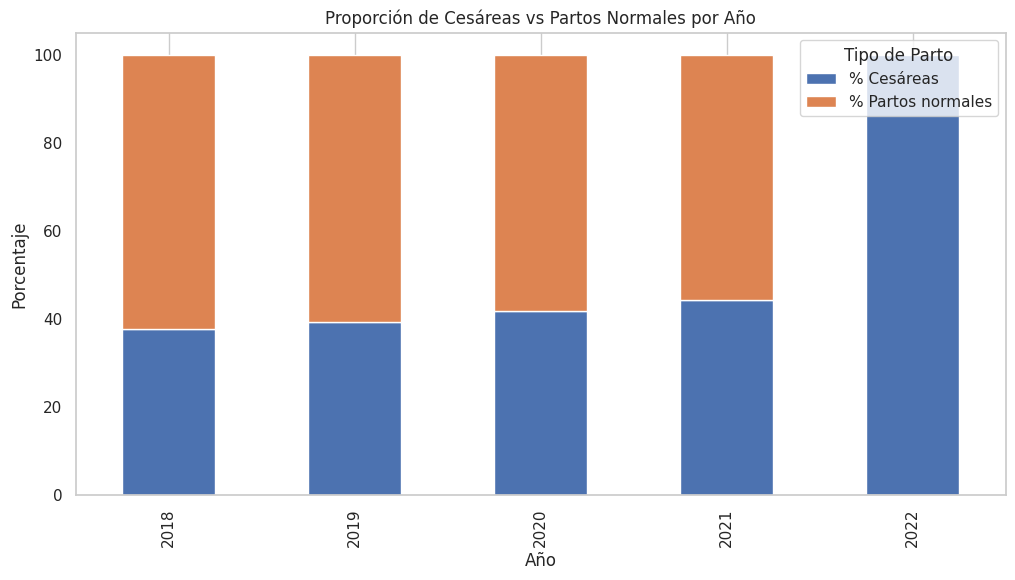

In [158]:
# Gráfico 4: Proporción de cesáreas vs partos normales
df_filtrado = df[df['practica_nombre'].isin(['Cesarea', 'Parto normal'])]
proporcion = df_filtrado.groupby(['anio', 'practica_nombre'])['cantidad'].sum().unstack()
proporcion['Total'] = proporcion.sum(axis=1)
proporcion['% Cesáreas'] = (proporcion['Cesarea'] / proporcion['Total']) * 100
proporcion['% Partos normales'] = (proporcion['Parto normal'] / proporcion['Total']) * 100

plt.figure(figsize=(12, 6))
proporcion[['% Cesáreas', '% Partos normales']].plot(kind='bar', stacked=True)
plt.title('Proporción de Cesáreas vs Partos Normales por Año')
plt.xlabel('Año')
plt.ylabel('Porcentaje')
plt.legend(title='Tipo de Parto')
plt.grid(axis='y')
plt.savefig('/content/drive/MyDrive/MD-G/nombre_del_grafico.png')
plt.show()

<ipython-input-159-5980f94536d3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cantidad', y='municipio_nombre', data=top_municipios, palette='mako')


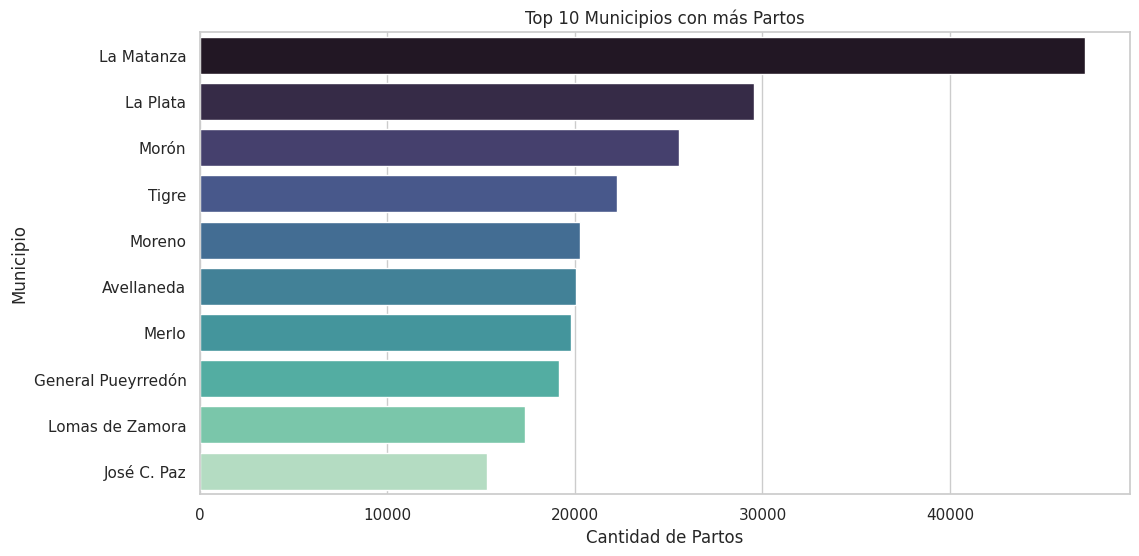

In [159]:
# Gráfico 5: Top 10 municipios con más partos
top_municipios = df.groupby('municipio_nombre')['cantidad'].sum().nlargest(10).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='cantidad', y='municipio_nombre', data=top_municipios, palette='mako')
plt.savefig('/content/drive/MyDrive/MD-G/nombre_del_grafico.png')
plt.title('Top 10 Municipios con más Partos')
plt.xlabel('Cantidad de Partos')
plt.ylabel('Municipio')
plt.show()

<Figure size 1200x600 with 0 Axes>

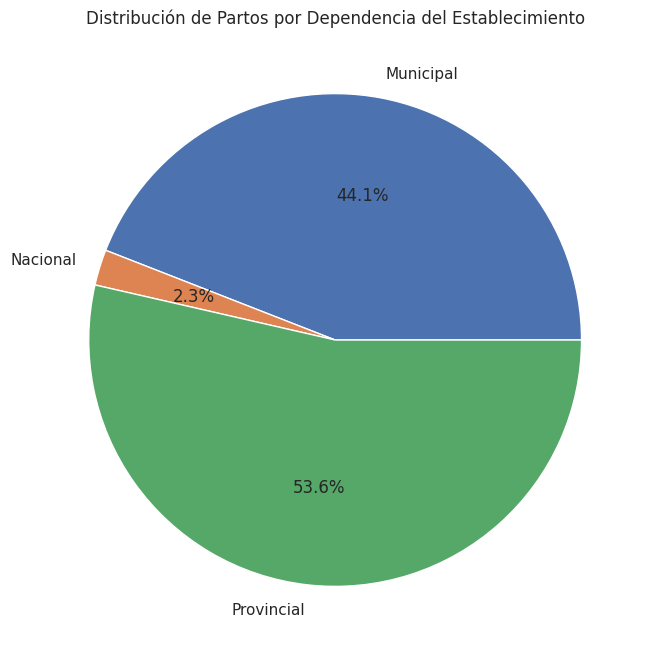

In [160]:
# Gráfico 6: Distribución de dependencias de establecimientos
dependencias = df.groupby('establecimiento_dependencia')['cantidad'].sum().reset_index()
plt.savefig('/content/drive/MyDrive/MD-G/nombre_del_grafico.png')
plt.figure(figsize=(8, 8))
plt.pie(dependencias['cantidad'], labels=dependencias['establecimiento_dependencia'], autopct='%1.1f%%')
plt.title('Distribución de Partos por Dependencia del Establecimiento')
plt.show()

#Explicación del Código:

##Carga y Exploración Inicial:
Cargamos los datos y hacemos un análisis exploratorio inicial para entender la estructura.

#Limpieza de datos:

Verificamos valores nulos (no hay).

Filtramos solo registros con cantidades mayores a 0.

#Análisis:

Agrupamos datos por tipo de parto, año y región sanitaria.

Calculamos proporciones de cesáreas vs partos normales.

#Visualizaciones:

Gráfico de barras de tipos de parto.

Línea temporal de partos por año.

Distribución por regiones sanitarias.

Proporción de cesáreas vs partos normales.

Top 10 de municipios con más partos.

Distribución por dependencia del establecimiento.